# Import required library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

from PIL import Image, ImageOps

# Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# Data Analysis

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

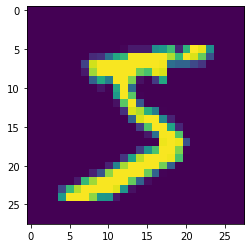

In [6]:
plt.imshow(X_train[0])

# Data Pre-Processing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model Building

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

# Training the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 195s 103ms/step - loss: 0.2911 - accuracy: 0.9459 - val_loss: 0.1052 - val_accuracy: 0.9673
Epoch 2/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0777 - accuracy: 0.9761 - val_loss: 0.1166 - val_accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.1010 - val_accuracy: 0.9711
Epoch 4/5
1875/1875 [==============================] - 192s 103ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0997 - val_accuracy: 0.9758
Epoch 5/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.1043 - val_accuracy: 0.9763


# Testing the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10433795303106308, 0.9763000011444092]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 89ms/step
[[2.37035357e-11 4.02153565e-20 2.39775906e-15 1.33595852e-13
  4.97287439e-19 3.56922955e-16 9.66210090e-23 1.00000000e+00
  1.84621118e-09 8.92001588e-14]
 [1.69142582e-11 2.28400740e-15 1.00000000e+00 5.66886626e-15
  1.45082682e-18 1.42091100e-17 1.38232705e-08 9.43912082e-20
  1.45648115e-13 2.08561429e-19]
 [1.63044900e-09 9.99997020e-01 6.79160728e-09 2.41297824e-12
  2.91080778e-06 2.19643432e-08 1.91560967e-09 3.77489325e-11
  4.48562343e-09 3.18847444e-12]
 [1.00000000e+00 1.94177089e-16 4.16544577e-10 4.38118068e-14
  1.02700932e-12 4.44104649e-12 3.01250780e-09 3.23853561e-15
  6.20657914e-10 2.53168642e-09]]


In [16]:
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Save model

In [17]:
model.save("model.h5")

# Testing

In [22]:
model=load_model("/content/model.h5")

In [26]:
img = Image.open("/content/three.PNG").convert("L")
img = img.resize((28, 28))
img_arr = np.array(img)
img_arr = img_arr.reshape(1, 28, 28, 1)
predict_value  = model.predict(img_arr)
predict_value = np.argmax(predict_value,axis = 1)
predict_value = pd.Series(predict_value,name="Label")
print(predict_value)

1/1 [==============================] - 0s 20ms/step
0    3
Name: Label, dtype: int64
